In [104]:
import pandas as pd


# Define the column names 
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the dataset
dataset = pd.read_csv('Downloads/diabetes_scale.txt', sep='\s+', header=None, names=column_names)

# Display the first few rows of the dataset
print(dataset.head())



     Pregnancies      Glucose BloodPressure      Insulin          BMI  \
-1   1:-0.294118   2:0.487437    3:0.180328  4:-0.292929         5:-1   
 1   1:-0.882353  2:-0.145729   3:0.0819672  4:-0.414141         5:-1   
-1  1:-0.0588235   2:0.839196   3:0.0491803         4:-1         5:-1   
 1   1:-0.882353  2:-0.105528   3:0.0819672  4:-0.535354  5:-0.777778   
-1          1:-1   2:0.376884   3:-0.344262  4:-0.292929  5:-0.602837   

   DiabetesPedigreeFunction          Age       Outcome  
-1             6:0.00149028   7:-0.53117  8:-0.0333333  
 1              6:-0.207153  7:-0.766866   8:-0.666667  
-1              6:-0.305514  7:-0.492741   8:-0.633333  
 1              6:-0.162444  7:-0.923997          8:-1  
-1                6:0.28465   7:0.887276        8:-0.6  


Basic Statistics:
Number of Samples: 768
Number of Features: 8
Number of Positive Instances: 500
Number of Negative Instances: 268

Summary Statistics:
Means:
[-0.54764104  0.21502038  0.13287657 -0.585122   -0.81134873 -0.04642089
 -0.66364108 -0.59197052]

Standard Deviations:
[0.39616281 0.32112355 0.31710168 0.32205724 0.27226704 0.23484428
 0.28276073 0.39175244]


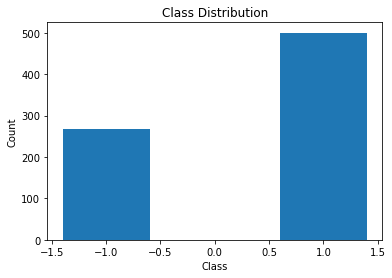

In [102]:
import numpy as np

# Load the data
with open('Downloads/diabetes_scale.txt', 'r') as file:
    lines = file.readlines()

data = []
labels = []

for line in lines:
    elements = line.strip().split()
    labels.append(int(elements[0]))
    features = {int(x.split(':')[0]): float(x.split(':')[1]) for x in elements[1:]}
    data.append(features)

# Convert to numpy arrays for easier manipulation
data = [[x.get(i, 0) for i in range(1, 9)] for x in data]
data = np.array(data)
labels = np.array(labels)

# Basic Statistics
print("Basic Statistics:")
print(f"Number of Samples: {len(data)}")
print(f"Number of Features: {data.shape[1]}")
print(f"Number of Positive Instances: {np.sum(labels == 1)}")
print(f"Number of Negative Instances: {np.sum(labels == -1)}")

# Summary Statistics
print("\nSummary Statistics:")
print("Means:")
print(np.mean(data, axis=0))
print("\nStandard Deviations:")
print(np.std(data, axis=0))



# Class Distribution
import matplotlib.pyplot as plt

unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [114]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load and Preprocess Data
with open('Downloads/diabetes_scale.txt', 'r') as file:
    lines = file.readlines()

data = []
labels = []

for line in lines:
    elements = line.strip().split()
    labels.append(int(elements[0]))
    features = {int(x.split(':')[0]): float(x.split(':')[1]) for x in elements[1:]}
    data.append(features)

# Convert to numpy arrays for easier manipulation
data = [[x.get(i, 0) for i in range(1, 9)] for x in data]
data = np.array(data)
labels = np.array(labels)

#  Initialize Weights and Bias
num_features = data.shape[1]
weights = np.random.randn(num_features)
bias = np.random.randn()

#  Train the Perceptron with Gradient Descent
num_epochs = 100
learning_rate = 0.1

for epoch in range(num_epochs):
    for i in range(len(data)):
        prediction = np.dot(weights, data[i]) + bias
        error = labels[i] - prediction
        weights += learning_rate * error * data[i]
        bias += learning_rate * error

#  Evaluate
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Function for making predictions
def predict(data_point):
    prediction = np.dot(weights, data_point) + bias
    return np.sign(prediction)

# Evaluate on testing set
correct_predictions = 0
for i in range(len(X_test)):
    predicted_label = predict(X_test[i])
    if predicted_label == y_test[i]:
        correct_predictions += 1

accuracy = correct_predictions / len(X_test)
print(f"Accuracy on testing set: {accuracy * 100:.2f}%")


Accuracy on testing set: 72.73%


In [115]:
from sklearn.metrics import confusion_matrix

# Function for making predictions
def predict(data_point):
    prediction = np.dot(weights, data_point) + bias
    return np.sign(prediction)

# Predict on the testing set
y_pred = [predict(x) for x in X_test]

# Generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[38 17]
 [25 74]]


Accuracy on testing set: 32.47%
Accuracy scores: [0.7647058823529411, 0.6535947712418301, 0.7450980392156863, 0.803921568627451, 0.7908496732026143]
Mean Accuracy: 75.16%


In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the model on your training data
knn_model.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")


Training Accuracy: 82.74%
Testing Accuracy: 68.83%


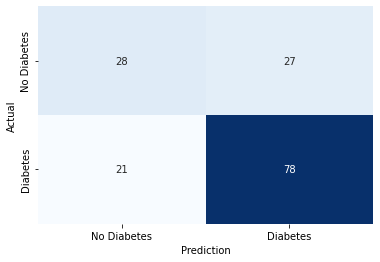

<Figure size 432x288 with 0 Axes>

In [117]:
# Assuming you have already trained the KNN model and made predictions

# Results - Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for KNN
c_matrix_knn = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(
    c_matrix_knn, annot=True, 
    xticklabels=['No Diabetes', 'Diabetes'], 
    yticklabels=['No Diabetes', 'Diabetes'], 
    cbar=False, cmap='Blues'
)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()


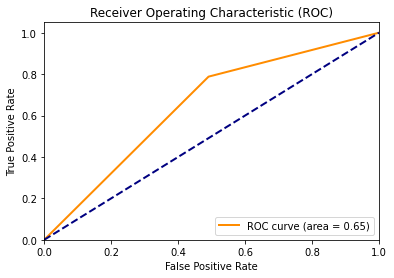

In [118]:
from sklearn.metrics import roc_curve, auc

# Assuming you have already trained the KNN model and made predictions

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
